In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()
os.chdir('C:/Users/dzfal')

In [4]:
df = pd.read_csv('OneDrive/Desktop/2023spring/BDP/A2/crimes_to_download.csv')
com_name = pd.read_csv('Downloads/chi_communities.csv')

In [10]:
df.dtypes

primary_type      object
community_area    object
count              int64
dtype: object

In [14]:
com_name['community_area'] = com_name['community_area'].astype(str)
com_name.dtypes

community_area         object
community_area_name    object
dtype: object

In [16]:
df1 = pd.merge(df, com_name.rename(columns={'name':'community_area'}), on='community_area',  how='left')
df1

,primary_type,community_area,count,community_area_name
0,THEFT,73,14232,Washington Heights
1,BATTERY,76,4114,O'Hare
2,ASSAULT,39,2765,Kenwood
3,MOTOR VEHICLE THEFT,7,4213,Lincoln Park
4,ASSAULT,32,7385,Loop
...,...,...,...,...
3516,PUBLIC INDECENCY,29,2,North Lawndale
3517,ASSAULT,1214,1,NaN
3518,OTHER NARCOTIC VIOLATION,61,1,New City
3519,HUMAN TRAFFICKING,1,1,Rogers Park


In [21]:
df1.dtypes

primary_type           object
community_area         object
count                   int64
community_area_name    object
dtype: object

## Question 12

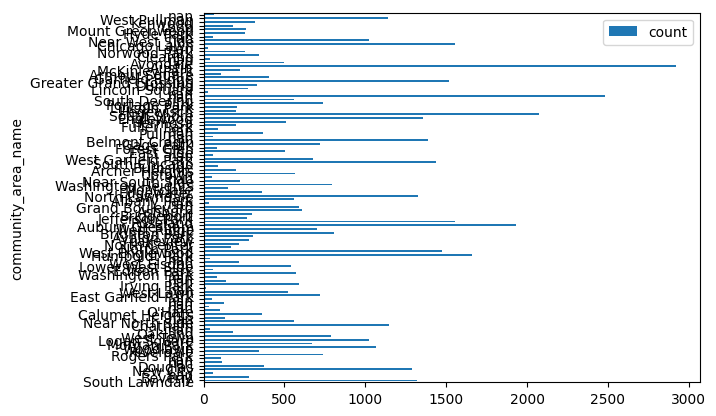

In [22]:
df_child = df1[df.primary_type == 'OFFENSE INVOLVING CHILDREN']
df_child = df_child.drop(columns=['primary_type', 'community_area'])
ax = df_child.plot.barh(x='community_area_name', y='count')

## Question 13

<AxesSubplot:xlabel='community_area_name', ylabel='primary_type'>

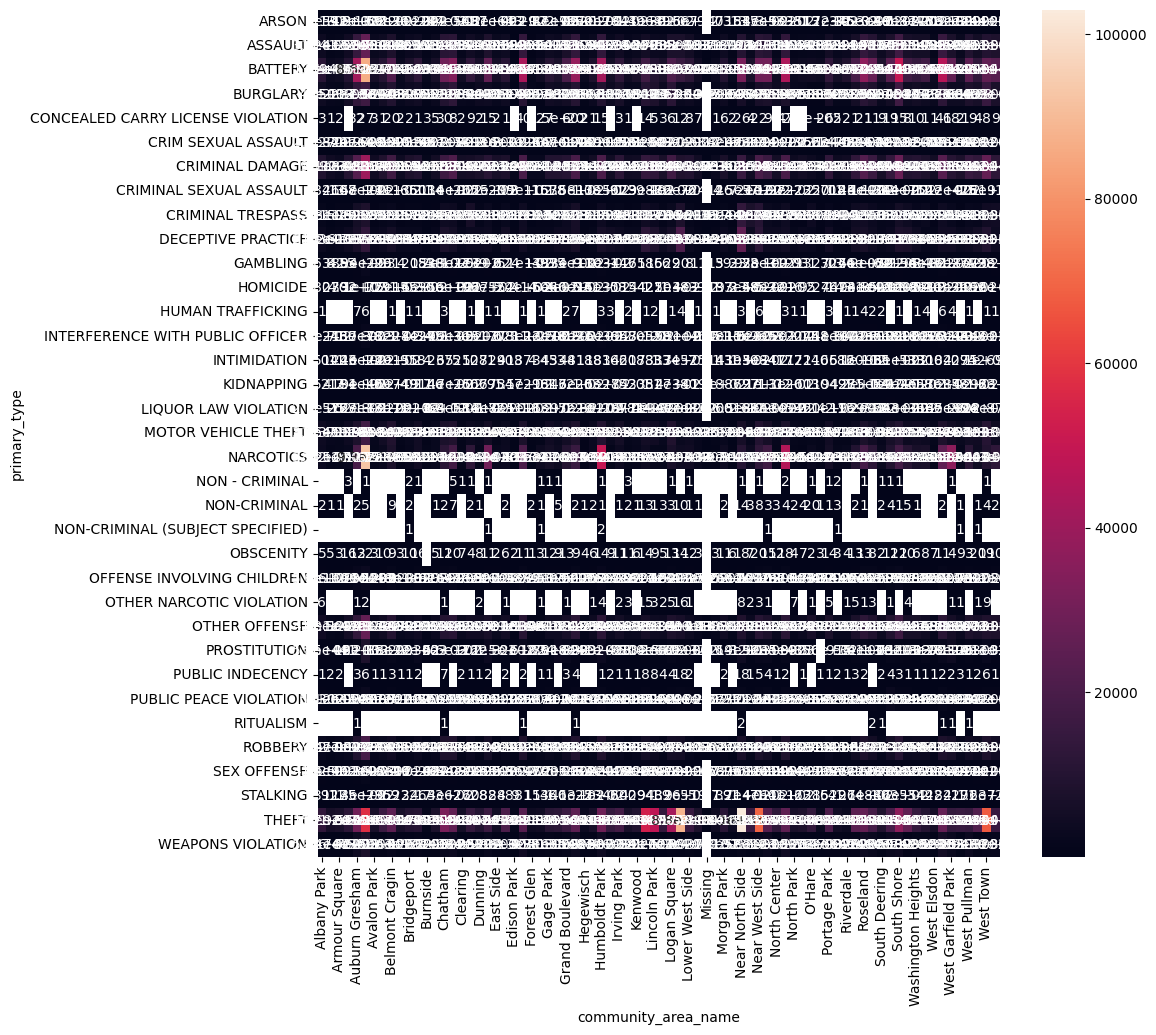

In [29]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11,11))

sns.heatmap(df1.pivot_table(index='primary_type', columns='community_area_name', values='count', aggfunc='sum'), ax=ax, annot=True)#annot=True makes the number in the cell, and use pivot table